In [9]:
pip install diffusers transformers accelerate torch torchvision torchaudio python-dotenv

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


100%|██████████| 50/50 [04:15<00:00,  5.12s/it]


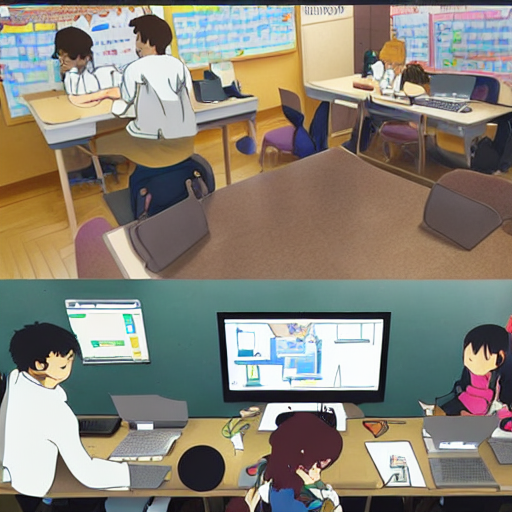

In [ ]:
import os
from dotenv import load_dotenv
from diffusers import StableDiffusionPipeline
import torch
from IPython.display import display

# Load environment variables from .env
load_dotenv()
token = os.getenv("HUGGINGFACE_HUB_TOKEN")

# Load pipeline (token auto-detected from env var, so no need to pass it here)
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
)

# Move pipeline to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = pipe.to(device)

# Define your prompt
prompt = "A classroom full of students learning Python programming on computers using Ghibli art"

# Generate image
image = pipe(prompt).images[0]

# Display image inside the notebook
display(image)